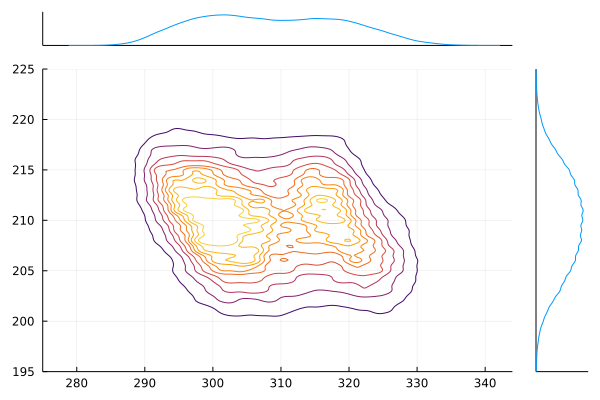

In [120]:
data_200 = CSV.read("data/sensor_data_200.txt", DataFrame, header=["date", "time", "ir", "lidar"], delim=' ')

d = deepcopy(data_200)
marginalkde(d.ir, d.lidar)

In [121]:
println(cov(d.ir, d.ir))
println(cov(d.lidar, d.lidar))
println(cov(d.ir, d.lidar))

109.39458336912217
23.40810659855455
-13.444661119156462


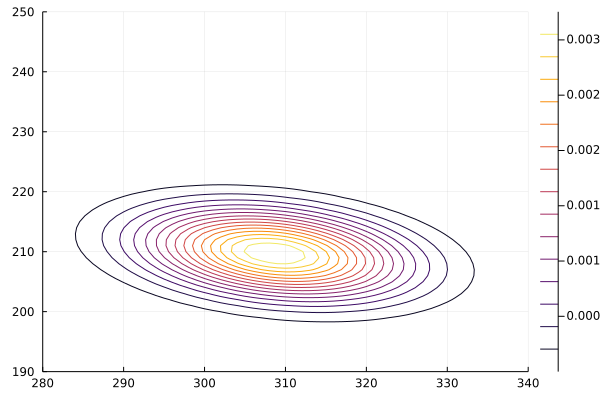

In [122]:
mu = [mean(d.ir), mean(d.lidar)]
sigma = [cov(d.ir, d.ir) cov(d.ir, d.lidar); cov(d.ir, d.lidar) cov(d.lidar, d.lidar)]
mvnorm = MvNormal(mu, sigma)

x_data = collect(280:340)
y_data = collect(190:250)
z_data = [pdf(mvnorm,[x,y]) for y in y_data, x in x_data]
plot(x_data, y_data, z_data) # 2D